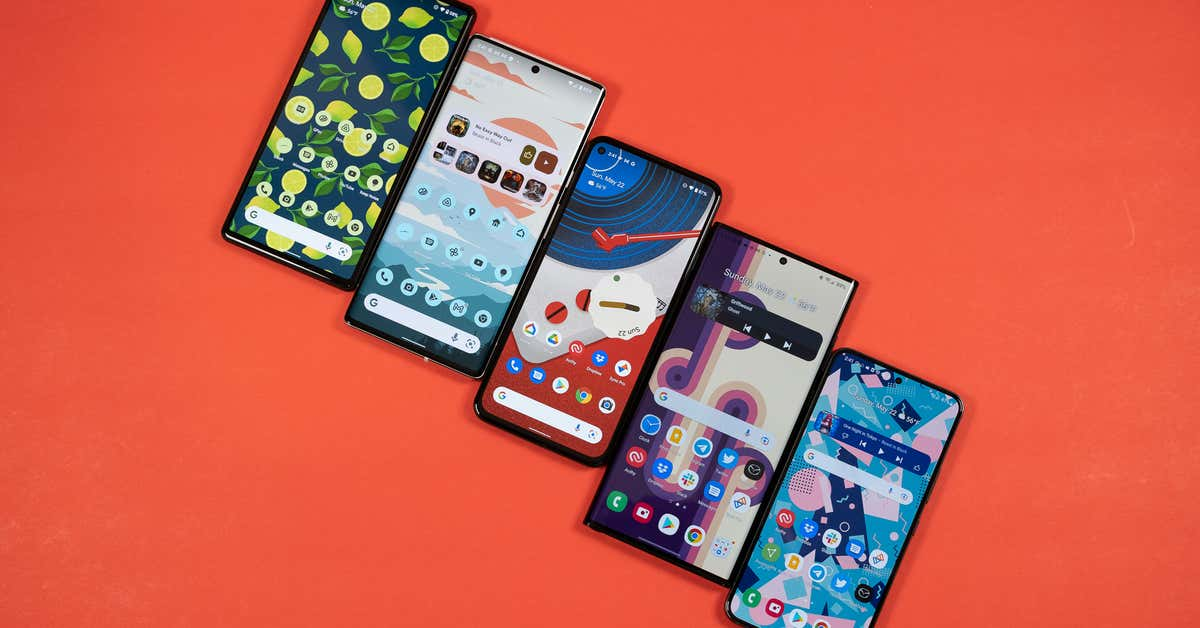

__In this notebook, we are going to build a model which classifes the mobiles into 0 very cheap, 1 cheap, 2  expensive, 3 very expensive<br>
This dataset has some incorrect data which is not real, so i may ignore sth if not i will have to remove them which causes loss information__

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

__Setting size/style :__

In [2]:
sns.set_style("darkgrid")
plt.rcParams.update({"font.size" : 12, "axes.labelsize" : 14})

# Read Datasets

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Dataset Overview

__Training dataset overview :__

In [4]:
df_train.head()

battery_power  Blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [5]:
df_train.shape

(2000, 21)

__Training dataset has 2000 rows and 21 columns__

__Testing dataset overview :__

In [6]:
df_test.head()

id  battery_power  Blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [7]:
df_test.shape

(1000, 21)

__Testing dataset has 1000 rows and 21 columns__

## Dataset Basic Information

__Training dataset basic information :__

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   Blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc


__Testing dataset basic information :__

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   Blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

+ __Conculsion :__
   - Training set :
       - __There is no object column in the training dataset__
       - __The price_range column is the target / dependent variable __ 
   - Testing set :
       - __There is no object column in test dataset__
       - __If the id column acts as an identifier, it has to be removed__

## Numerical Columuns Description

__Training Dataset Numerical Columns Description :__

In [10]:
df_train.describe(include = "number").T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
Blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
Blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

__Test Dataset Numerical Columns Description :__

In [11]:
df_test.describe(include = "number").T

count       mean          std    min      25%     50%  \
id             1000.0   500.5000   288.819436    1.0   250.75   500.5   
battery_power  1000.0  1248.5100   432.458227  500.0   895.00  1246.5   
Blue           1000.0     0.5160     0.499994    0.0     0.00     1.0   
clock_speed    1000.0     1.5409     0.829268    0.5     0.70     1.5   
dual_sim       1000.0     0.5170     0.499961    0.0     0.00     1.0   
fc             1000.0     4.5930     4.463325    0.0     1.00     3.0   
four_g         1000.0     0.4870     0.500081    0.0     0.00     0.0   
int_memory     1000.0    33.6520    18.128694    2.0    18.00    34.5   
m_dep          1000.0     0.5175     0.280861    0.1     0.30     0.5   
mobile_wt      1000.0   139.5110    34.851550   80.0   109.75   139.0   
n_cores        1000.0     4.3280     2.288155    1.0     2.00     4.0   
pc             1000.0    10.0540     6.095099    0.0     5.00    10.0   
px_height      1000.0   627.1210   432.929699    0.0   263.75   564.5   
px_width       1000.0  1239.7740   439.670981  501.0   831.75  1250.0   
ram            1000.0  2138.9980  1088.092278  263.0  1237.25  2153.5   
sc_h           1000.0    11.9950     4.320607    5.0     8.00    12.0   
sc_w           1000.0     5.3160     4.240062    0.0     2.00     5.0   
talk_time      1000.0    11.0850     5.497636    2.0     6.75    11.0   
three_g        1000.0     0.7560     0.429708    0.0     1.00     1.0   
touch_screen   1000.0     0.5000     0.500250    0.0     0.00     0.5   
wifi           1000.0     0.5070     0.500201    0.0     0.00     1.0   

                   75%     max  
id              750.25  1000.0  
battery_power  1629.25  1999.0  
Blue              1.00     1.0  
clock_speed       2.30     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       49.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           6.00     8.0  
pc               16.00    20.0  
px_height       903.00  1907.0  
px_width       1637.75  1998.0  
ram            3065.50  3989.0  
sc_h             16.00    19.0  
sc_w              8.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0

## Useful Self-made Functions For Data visualization

In [12]:
def set_freq_label(ax, fmt = "%1.f" , padding = 0):
    ''' set label for the bars of a barplot '''
    for cont in ax.containers:
        ax.bar_label(cont, fmt = fmt, padding = padding)
# ------------------------------------------------------------------------------------
def plot_unique_freq(df):
    ''' plot a nunique value barplot with bar labels '''
    ax = df.nunique().sort_values().plot.bar(figsize = (16,7), color = "royalblue")
    set_freq_label(ax, fmt = "%1.f", padding = 5)
    plt.xlabel("Columns")
    plt.ylabel("Frequency")
    plt.margins((0.1))
    plt.title("Column Unique Value Counts", size = 20, y = 1.08, fontweight = "bold")
    plt.grid()
    plt.show()

##  Seperate Continuous and Categorical Features

__Plotting the number of feature unique values:__

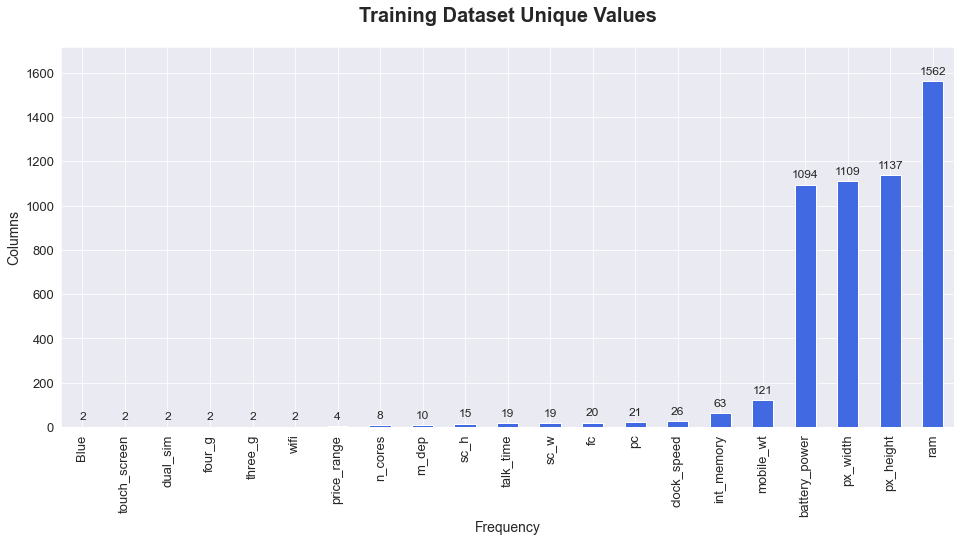

In [13]:
ax = df_train.nunique().sort_values().plot.bar(figsize = (16,7), color = "royalblue")
set_freq_label(ax, fmt = "%1.f", padding = 5)
plt.ylabel("Columns")
plt.xlabel("Frequency")
plt.margins(0.1)
plt.title("Training Dataset Unique Values", size = 20, y = 1.05, fontweight = "bold")
plt.tick_params(labelsize = 13)

- __Training :__
  * __The columns from n_cores to Blue and the columns ( ram & int_memory ) <br> are absulote categorical, the others appear to be continuous features in reality__ 
  * __The price_range ( target ) is discrete and multiclass label, it has 4 clasess__ 

###  Categorical Variables

In [14]:
catg_vars = df_train["price_range,Blue,touch_screen,dual_sim,four_g,three_g,wifi,n_cores,int_memory,ram".split(",")].columns
catg_vars

Index(['price_range', 'Blue', 'touch_screen', 'dual_sim', 'four_g', 'three_g',
       'wifi', 'n_cores', 'int_memory', 'ram'],
      dtype='object')

__Training dataset frequency disturbution of categorical features :__ 

In [15]:
for col in catg_vars:
    print(df_train[col].value_counts())

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64
0    1010
1     990
Name: Blue, dtype: int64
1    1006
0     994
Name: touch_screen, dtype: int64
1    1019
0     981
Name: dual_sim, dtype: int64
1    1043
0     957
Name: four_g, dtype: int64
1    1523
0     477
Name: three_g, dtype: int64
1    1014
0     986
Name: wifi, dtype: int64
4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64
27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64
1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: ram, Length: 1562, dtype: int64


+ __The price_range variable (target) is highly balanced__

__Testing dataset frequency disturbution of categorical features :__

In [16]:
for col in catg_vars.drop("price_range"):
    print(df_train[col].value_counts())

0    1010
1     990
Name: Blue, dtype: int64
1    1006
0     994
Name: touch_screen, dtype: int64
1    1019
0     981
Name: dual_sim, dtype: int64
1    1043
0     957
Name: four_g, dtype: int64
1    1523
0     477
Name: three_g, dtype: int64
1    1014
0     986
Name: wifi, dtype: int64
4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64
27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64
1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: ram, Length: 1562, dtype: int64


### Numerical & Quantitative Variables

In [17]:
cont_vars = df_train.drop(catg_vars, axis = 1).columns

In [18]:
cont_vars

Index(['battery_power', 'clock_speed', 'fc', 'm_dep', 'mobile_wt', 'pc',
       'px_height', 'px_width', 'sc_h', 'sc_w', 'talk_time'],
      dtype='object')

# Correlation Analysis

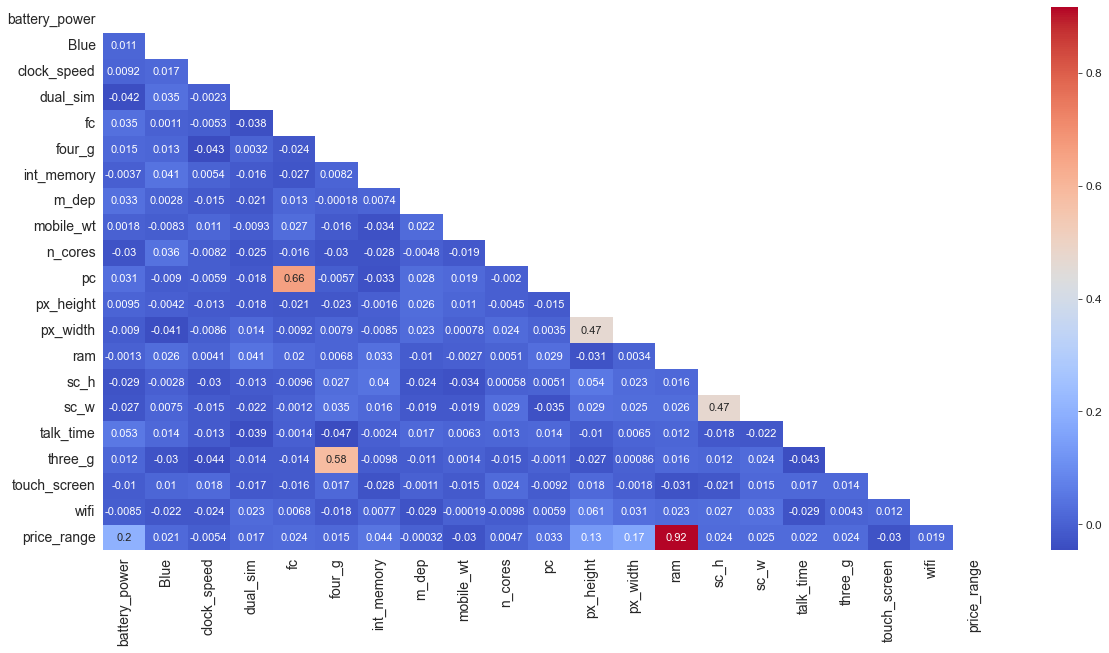

In [19]:
sns.set_style("white")
plt.figure(figsize = (20,10))
df_corr = df_train.corr(method = "spearman")
mask = np.triu(np.ones_like(df_corr, dtype = bool))
sns.heatmap(df_corr, annot = True, cmap = "coolwarm", cbar = True, annot_kws = {"size" : 11}, mask = mask)
plt.tick_params(labelsize = 14)
plt.show()

+ __Conculsion :__
    - With the target ( price_range ) :
        * There is a high positive correlation between __ram and price_range ( target ) %92__,<br>
        it is the most important feature in this dataset
        * There is almost a good positive correlation between <br> __px_width/px_hieght/battery_power and the target__
    - With the other features :
        * There is a high positive correlation between __( px_height and px_width )__ as well as <br>
        __( pc with fc )__ and __( sc_w with sc_h )__ and __( four_g with three_g )__

    
    

# Data Preprocessing

## Feature Subset Selection

__The id column in testing set :__

In [20]:
df_test.id

0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: id, Length: 1000, dtype: int64

__The amount of unique values :__

In [21]:
df_test.id.nunique()

1000

__As a result, it acts as an identifier, the id column has to be removed__

__Removing the id column :__

In [22]:
df_test = df_test.drop("id", axis = 1)

## Data Cleansing 

In [23]:
cont_vars

Index(['battery_power', 'clock_speed', 'fc', 'm_dep', 'mobile_wt', 'pc',
       'px_height', 'px_width', 'sc_h', 'sc_w', 'talk_time'],
      dtype='object')

### Training Dataset Outlier Detection

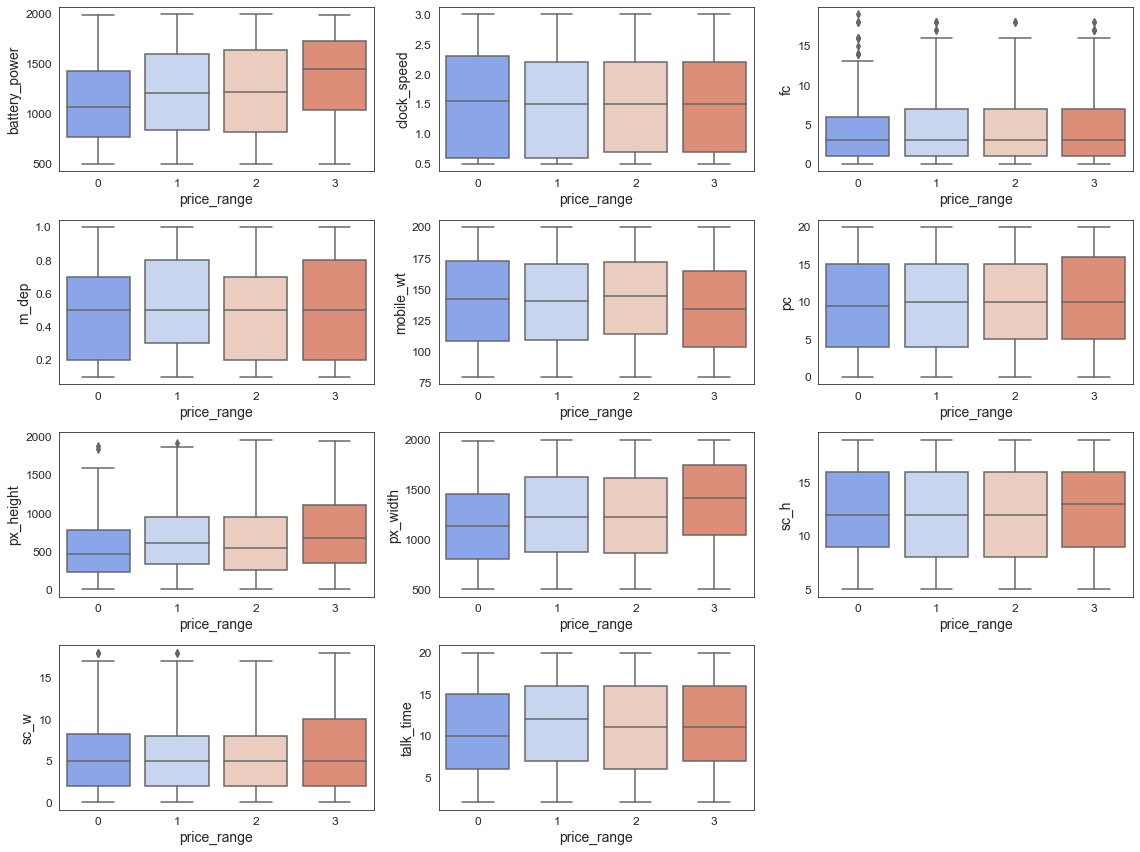

In [24]:
fig = plt.figure(figsize = (16, 12))
for idx, col in enumerate(cont_vars):
    plt.subplot(4,3, idx + 1)
    sns.boxplot(x = "price_range", y = col, data = df_train, palette = "coolwarm")
plt.tight_layout()
plt.show()

+ __Conculsion :__
  - About the fc feature ( Front camera mega pixel ) :
    * it makes sense that in the 0 (very cheap) and 1 (cheap) mobile phones, we do not have <br>
    front camera with higher than almost 13 or 16 mega pixel, so the outliers seem to be noise <br>
    where price_range is 0, 1
  - About the px_height feature ( Pixel Resolution Height ) :
    * the mobile phones which are 0 (very cheap) do not have the resolution height higher than almost 1600<br>
    the outliers in the 0 price_range are noise
  - Absolute noise data : 
    * in the px_height where px_height = 0, the data is noise : <br>
    all the mobile phones have screen and a screen needs pixel to show
    * in the sc_w where sc_w = 0, the data is noise : <br>
    we do not have any mobile phone with zero screen width
    


__Getting the specified noise in above conculsion:__

In [25]:
list_index = []
outlier_info = []
for col in ["fc", "px_height"]:
    indexes = []
    for target_class in df_train.price_range.unique():
        if (col == "fc"):
            if (target_class in [2,3]):
                continue
        else :
            if (target_class != 0) :
                continue
        df = df_train[df_train.price_range == target_class][col]
        Q1 = df.quantile(.25)
        Q3 = df.quantile(.75)
        IQR = Q3 - Q1
        minimum = Q1 - (1.5 * IQR)
        maximum = Q3 + (1.5 * IQR)
        indexes.extend(df[(df < minimum) | (df > maximum)].index)
        list_index.extend(indexes)
    outlier_info.append({"Feature" : col, "Outlier_index" : indexes,
                         "Outlier%" : (len(indexes) / df_train.shape[0]) * 100})
outlier_info = pd.DataFrame(outlier_info)

__These indexes must be removed :__

In [26]:
outlier_info

Feature                                      Outlier_index  Outlier%
0         fc  [169, 305, 1406, 1549, 1554, 31, 157, 302, 323...      1.05
1  px_height                                        [873, 1397]      0.10

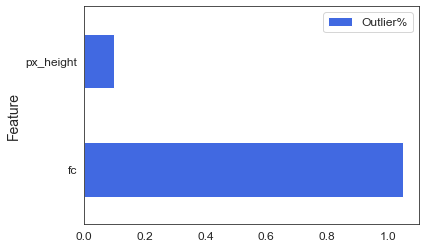

In [27]:
outlier_info.plot.barh(x = "Feature", y = "Outlier%", color = "royalblue")
plt.show()

### Absolute noise data or incorrect data

__The px_height feature :__

In [28]:
df_train[df_train.px_height == 0]

battery_power  Blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1481    0.1         99        4  ...          0      1987  3692    13     0   
1933    0.6        154        8  ...          0       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1  

[2 rows x 21 columns]

In [29]:
px_height_noiseIndex_train = df_train[df_train.px_height == 0].index

In [30]:
px_height_noiseIndex_train

Int64Index([1481, 1933], dtype='int64')

__The sc_w feature :__

In [31]:
sc_w_noise_train = df_train[df_train.sc_w == 0].sc_w.values

### Testing Dataset Outlier detection

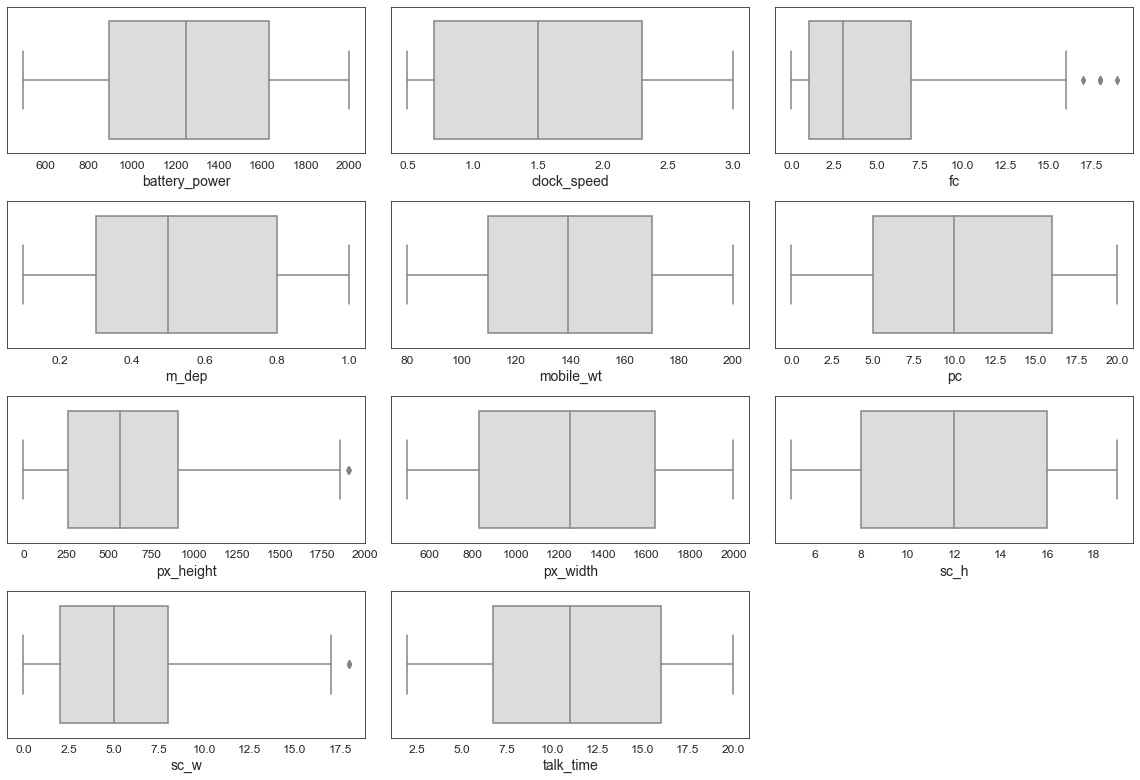

In [32]:
fig = plt.figure(figsize = (16, 11))
for idx, col in enumerate(cont_vars):
    plt.subplot(4,3, idx + 1)
    sns.boxplot(x = col, data = df_test, palette = "coolwarm")
plt.tight_layout()
plt.show()

+ __About the px_height like in the training analysis, we have incorrect data where px_height = 0 as well as <br>
in the sc_w where sc_w = 0__

__The px_height feature :__

In [33]:
px_height_noiseIndex_test = df_test[df_test.px_height == 0].index

__The sc_w feature :__

In [34]:
sc_w_noise_test = df_test[df_test.sc_w == 0].sc_w.values

##  Discover Missing Value

__Training Dataset :__

In [35]:
df_train.isna().sum()

battery_power    0
Blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

__There is no missing data in training dataset__

__Testing Dataset :__

In [36]:
df_test.isna().sum()

battery_power    0
Blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

__There is no missing data in testing dataset__

## Discover Duplicates

__Training Dataset :__

In [37]:
df_train.duplicated().sum()

0

__There is no duplicated rows in training dataset__

__Testing dataset :__

In [38]:
df_test.duplicated().sum()

0

__There is no duplicated rows in testing dataset__

## Dealing With Outlier Data

### Training Dataset

In [39]:
outlier_info

Feature                                      Outlier_index  Outlier%
0         fc  [169, 305, 1406, 1549, 1554, 31, 157, 302, 323...      1.05
1  px_height                                        [873, 1397]      0.10

__Removing the outliers :__

In [40]:
df_train.drop(outlier_info["Outlier_index"][0], inplace = True)

In [41]:
df_train.drop(outlier_info["Outlier_index"][1],inplace = True)

In [42]:
px_height_noiseIndex_train

Int64Index([1481, 1933], dtype='int64')

In [43]:
df_train.drop(px_height_noiseIndex_train, inplace = True)

__Replacing the data where sc_w = 0 with its mean :__

In [44]:
df_train["sc_w"].replace(sc_w_noise_train, round(df_train.sc_w.mean()), inplace = True)

### Testing Dataset

In [45]:
px_height_noiseIndex_test

Int64Index([420, 819], dtype='int64')

__Removing the outliers :__

In [46]:
df_test.drop(px_height_noiseIndex_test, inplace = True)

__Replacing the data where sc_w = 0 with its mean :__

In [47]:
df_test.sc_w.replace(sc_w_noise_test, round(df_test.sc_w.mean()), inplace = True)

#  EDA

##  Target Vs Continuous Features Analysis

In [48]:
cont_vars

Index(['battery_power', 'clock_speed', 'fc', 'm_dep', 'mobile_wt', 'pc',
       'px_height', 'px_width', 'sc_h', 'sc_w', 'talk_time'],
      dtype='object')

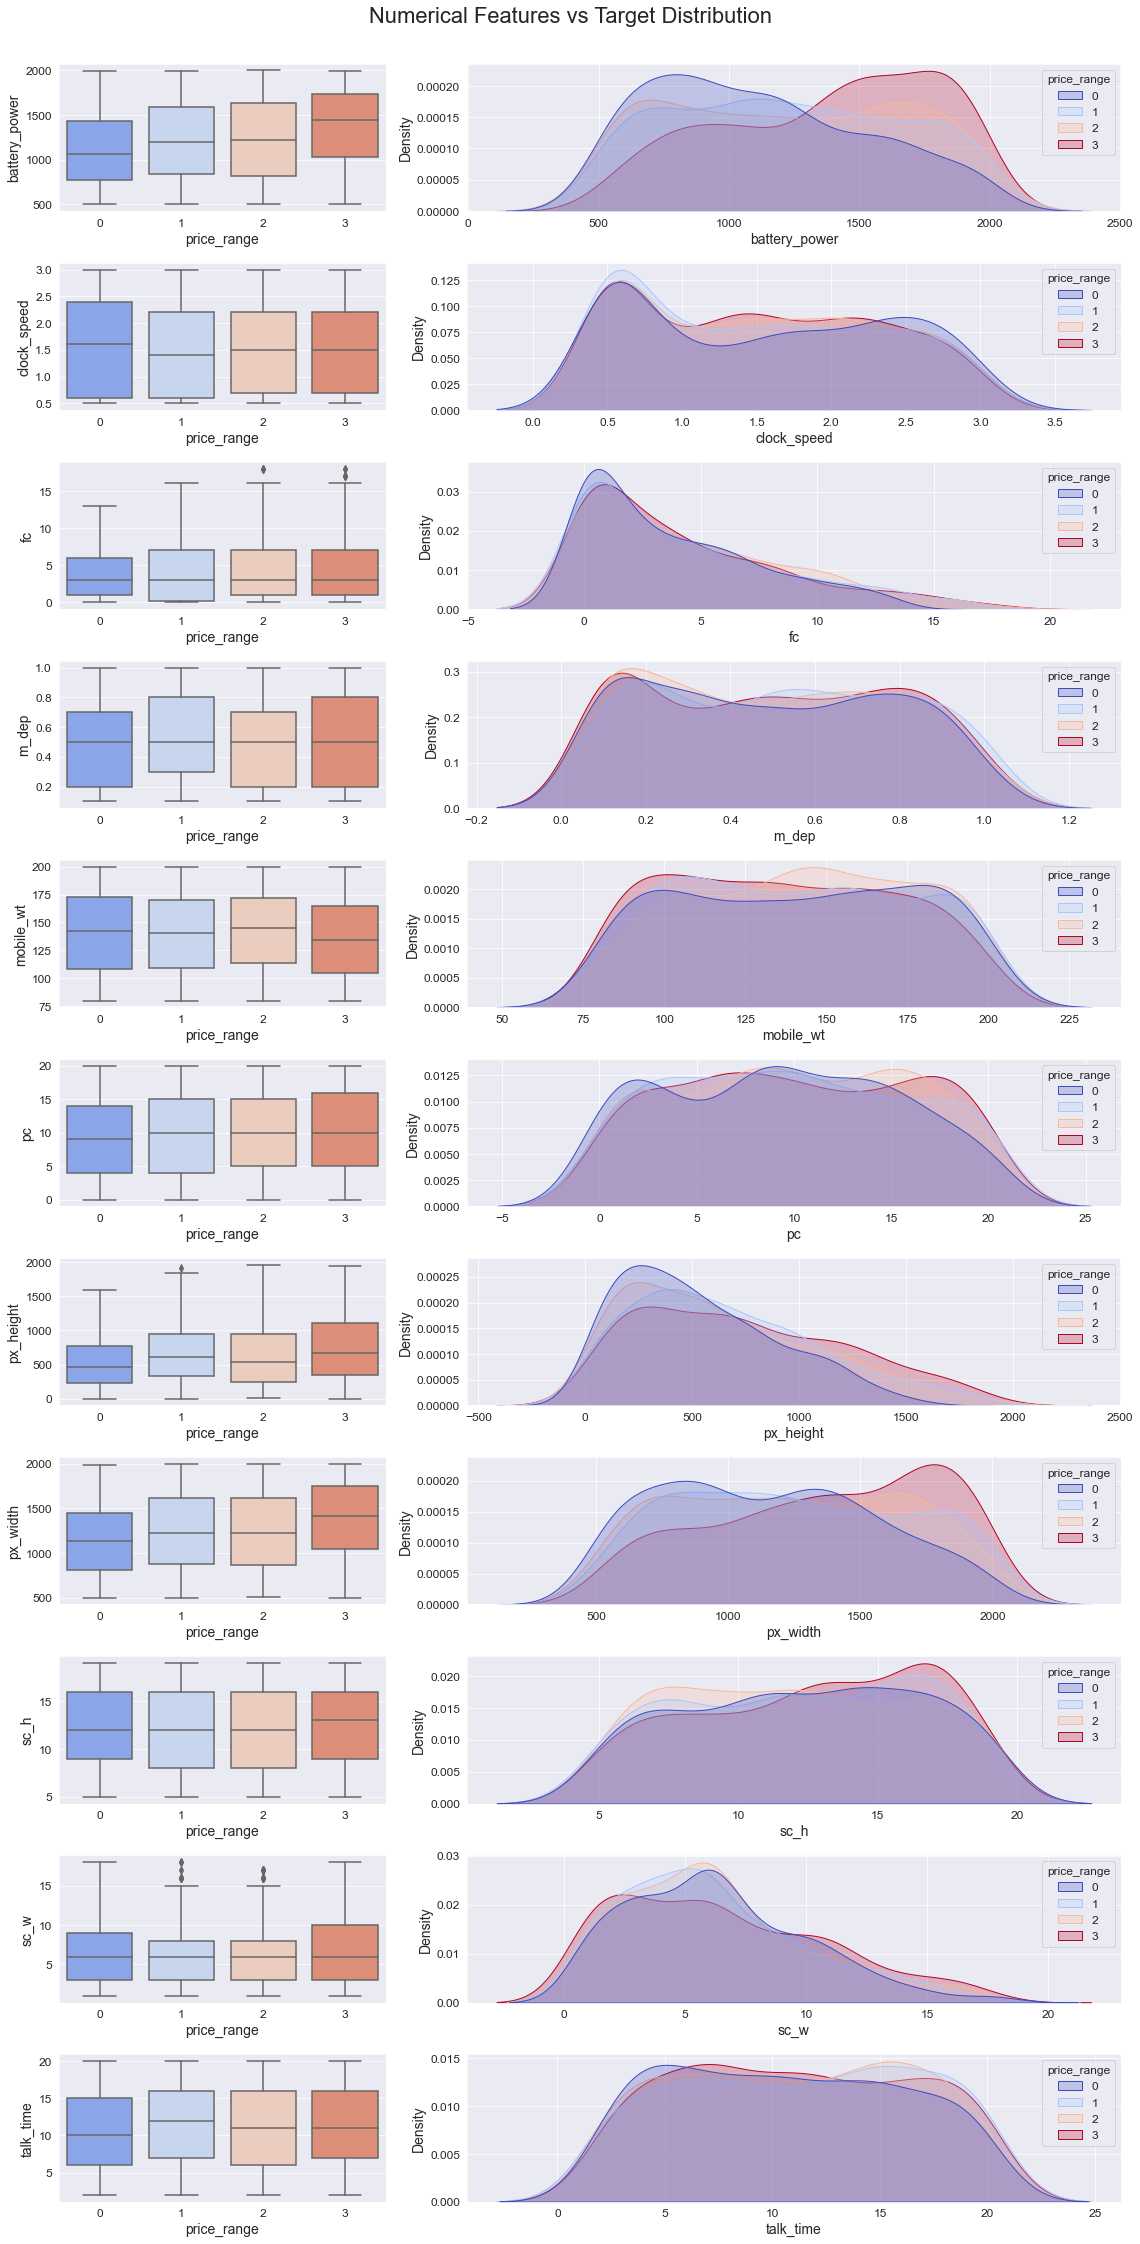

In [49]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(11, 2, figsize = (16, 31), gridspec_kw = {"width_ratios" : [1, 2]})

i = 0
for idx, col in enumerate(cont_vars):
    
    sns.boxplot(y = col, x = "price_range", data = df_train, palette = "coolwarm", ax = ax[idx,0])
    
    sns.kdeplot(x = col, data = df_train, palette = "coolwarm", ax = ax[idx, 1], hue = "price_range",
                      fill = True)
    
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22, y = 1.005)
plt.tight_layout()
plt.show()

+ __Analysis :__
  - battery_power :
      * it has almost a normal disturbution
      * it has a great impact on the target because when switching on <br>
      the target clasess , the medians in boxplot is highly changed
      * it says that the more expensive the mobile phones, the more battery power they have
  - clock_speed : 
      * it has almost a normal disturbution
      * in terms of its boxplot, the median in class zero (very cheap mobile phone ) <br>
      is higher than other means that very cheap mobile phones have higher clock speed which is unsual<br>
      if look closer to the densities we realize that the clasess 2,3 are higher than others which means<br>
      the expensive and very expensive mobiles have higher clock speed
  - fc (front camera megapixel) :
      * it has a positive skew disturbution
      * it has a little impact on the target because of the densities of clasess change a little when switching <br>
      on the target classes
      * it can almost say that the more expensive the mobile phones, the more front camera capacity they have 
  - m_dep :
      * it has almost a normal disturbution
      * it does not have any impact on the target, bacause in reality, we have both low and high depth for any kind of mobiles
  - mobile_wt : 
      * it has almost a normal disturbution
      * it has a little impact on the target because when switching on the clasess , the medians in boxplot change a little
      * it says that approximately the more expensive the mobile phones, the less weight they have 
  - pc ( primary camera megapixel ) :
      * it has almost a normal disturbution
      * it has a little impact on the target because when switching on the clasess, the medians in boxplot change a little
      * it says that approximately the more expensive the mobile phones, the more main camera capacity they have
  - px_height :
      * it has a positive skew disturbution
      * it has a great impact on the target because when switching on <br>
      the target clasess , the medians in boxplot is highly changed
      * it says that the more expensive the mobile phones, the more pixels of screen's height they have
  - px_width : 
      * it has almost a normal disturbution
      * it has a great impact on the target because when switching on <br>
      the target clasess , the medians in boxplot is highly changed
      * it says that the more expensive the mobile phones, the more pixels of screen's width they have
  - talk_time :
      * it has almost a normal disturbution
      * it has a little impact on the target because when switching on <br>
      the target clasess , the medians in boxplot is not highly changed
      * it can almost say that the more expensive the mobile phones, the more time their batteries can last
  - The most important __continuous__ features on target : 
      * battery_power
      * px_height
      * px_width
  - __Approximately, 90 percent of the features have normal distribution and <br>
  the others have skew distribution__


## Target Vs Categorical Features Analysis

In [50]:
catg_vars.drop(["ram", "int_memory", "price_range"])

Index(['Blue', 'touch_screen', 'dual_sim', 'four_g', 'three_g', 'wifi',
       'n_cores'],
      dtype='object')

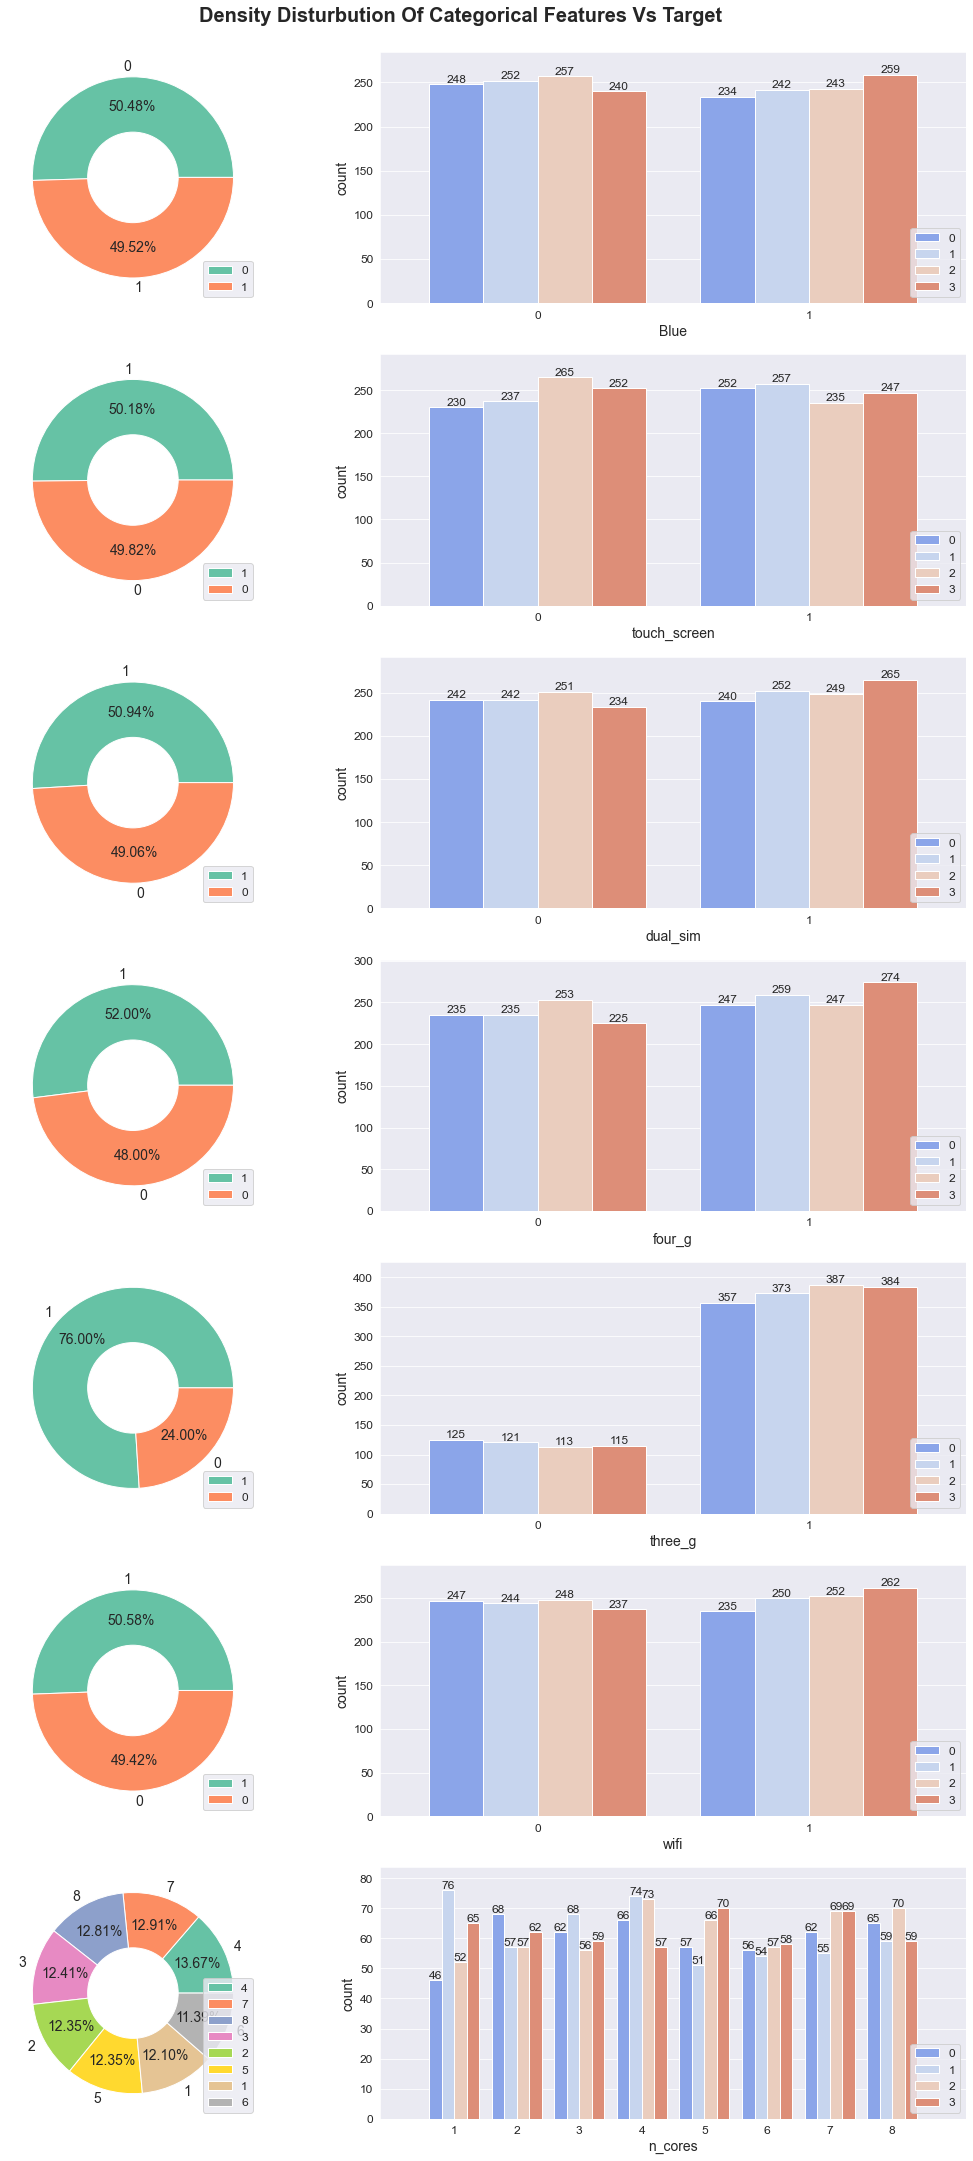

In [51]:
sns.set_style("darkgrid")
fig = plt.figure(figsize = (16, 30))
i = 0
for idx, col in enumerate(catg_vars.drop(["ram", "int_memory", "price_range"])):
    plt.subplot(7,2,  i + 1)
    value_counts = df_train[col].value_counts()
    plt.pie(value_counts.values , labels = value_counts.keys(), autopct = "%.2f%%", textprops={'fontsize':14},
           colors = sns.color_palette("Set2"), pctdistance = 0.7)
    hole = plt.Circle((0, 0), 0.45, facecolor='white')
    plt.gcf().gca().add_artist(hole)
    plt.legend(loc = 4)
    
    plt.subplot(7,2,  i + 2)
    ax = sns.countplot(x = col, data = df_train, palette = "coolwarm", hue = "price_range", )
    set_freq_label(ax)
    plt.legend(loc = 4)
    plt.margins((0.1))
    i += 2
plt.suptitle("Density Disturbution Of Categorical Features Vs Target", y = 1, x = 0.55, size = 20,
    fontweight = "bold")
plt.tight_layout()
plt.show()

### ram and int_memory  <br>
   - __as a result of these features have continuous disturbution but they are categorical, i use kdeplot to analyze them__

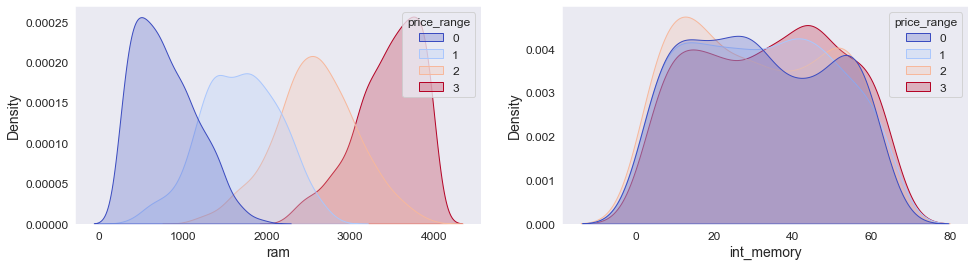

In [52]:
sns.set_style("darkgrid")
plt.figure(figsize = (16,4))
plt.subplot(1,2, 1)
sns.kdeplot(x = "ram", data = df_train, hue = "price_range", fill = True, palette = "coolwarm")
plt.grid()
plt.subplot(1,2, 2)
sns.kdeplot(x = "int_memory", data = df_train, hue = "price_range", fill = True, palette = "coolwarm")
plt.grid()
plt.show()

### Target Disturbution

In [53]:
target_value_counts = df_train.price_range.value_counts().sort_index()
fig = px.pie(values = target_value_counts.values, 
             labels = np.array(["Very Cheap", "Cheap", "Expensive", "Very expensive"]),
             names = np.array(["Very Cheap", "Cheap", "Expensive", "Very expensive"]), title = "Target Disturbution",)
fig.show()

__The target ( price_range ) is highly balanced , which is great__

+ __Consulsion :__
    - Blue :
        * it is balanced
        * it has almost a good impact on the target, because when switching on the classes, <br>the bars' order of the target clasess is changed
        * a mobile with bluetooth is more expensive
    - touch screen :
        * it is balanced
        * it has almost a good impact on the target, because when switching on the classes, <br>the bars' order of the target clasess is changed
         * a mobile with touch screen is more expensive
    - dual sim : 
         * it is balanced
         * it does not have a good impact on the target, because It shows a similar behavior in <br> all cost types of mobile phones
    - four_g :
         * it is balanced
         * it has almost a good impact on the target, because when switching on the classes, <br>the bars' order of the target clasess is changed
         * a mobile with four_g attribue is more expensive than the others
    - three_g :
        * it is imbalanced
        * it has almost a good impact on the target, because when switching on the classes, <br>the bars' order of the target clasess is changed
        * a mobile with three_g attribue is more expensive than the others
    - wifi :
        * it is balanced
        * it has almost a good impact on the target, because when switching on the classes, <br>the bars' order of the target clasess is changed
        * a mobile with wifi attribue is more expensive than the others
    - n_cores :
        * it is balanced
        * it has almost a good impact on the target, because when switching on the classes, <br>the bars' order of the target clasess is changed
        * a mobile with more cores is much more expensive than the others
    - __ram :__
        * it has the greatest impact on the target in this dataset, as shown the disturbutions are highly changed <br> when switching on the target classes
        * a mobile phone with more ram is more expensive than the others
    - int_memory :
        * it does not have a good impact on the target
        * it can almost say that more int_memory more expensive mobile
    - Most important features :
        * ram ( the most important feature in this dataset )
        * three_g
        * wifi
        * n_cores

# Model Building With DTs, SVM, RF

__Point : The dataset is balanced__

In [54]:
df_train.head()

battery_power  Blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

## Self-made Functions For Models

In [55]:
def hyperparameter_tuning (model, params, X_train, y_train):
    
    kfold = StratifiedKFold(shuffle = True, random_state = 0)
    grid_model = GridSearchCV(model, param_grid = params, cv = kfold, scoring = "accuracy", n_jobs = -1)
    grid_model.fit(X_train, y_train)
    print("Best  hyperparameters : \n", grid_model.best_params_,"*" *30, 
         "Best accuracy_score : \n", grid_model.best_score_, sep = "\n")
    return grid_model.best_estimator_

# ------------------------------------------------------------------------------------------------------------

def model_evaluation(model, X_train, X_test, y_train, y_test, model_name) :
    
    sns.set_style("darkgrid")
    train_test_scores = []
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    cm = confusion_matrix(y_test, y_pred_test)
    train_test_score = pd.DataFrame({"Train_score" : [model.score(X_train, y_train)],
                                    "Test_score" : [model.score(X_test, y_test)]}, index = [model_name])
    print("Test result".center(60, "*"),classification_report(y_test, y_pred_test),
         sep = "\n")
    print("Train result".center(60, "*"), classification_report(y_train, y_pred_train),
         sep = "\n")
    print("*" * 60)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=80)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax = ax1)
    ax1.grid()
    
    
    train_test_score.plot.barh(ax = ax2, cmap = "coolwarm")
    set_freq_label(ax2, "%.2f")
    plt.margins((0.09))
    plt.tight_layout()
    return train_test_score

# Decision Tree

__Train test splitting :__

In [56]:
X, y = df_train.drop("price_range", axis = 1), df_train.price_range

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [58]:
print("*" * 30,f"X_train shape : {X_train.shape}", 
     f"X_test shape : {X_test.shape}",
     f"y_train shape : {y_train.shape}",
     f"y_test shape : {y_test.shape}",
      "*" * 30, sep = "\n")

******************************
X_train shape : (1481, 20)
X_test shape : (494, 20)
y_train shape : (1481,)
y_test shape : (494,)
******************************


__Hyperparameter tuning :__

In [59]:
tree_pipline = make_pipeline(StandardScaler(), DecisionTreeClassifier())

params = {
    'decisiontreeclassifier__max_depth': [ 5, 10, 20, 25, 30],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100, 150],
    'decisiontreeclassifier__min_samples_split' : [5, 10, 20, 50, 100, 150]}
grid_model_dts = hyperparameter_tuning(tree_pipline, params, X_train, y_train)

Best  hyperparameters : 

{'decisiontreeclassifier__max_depth': 25, 'decisiontreeclassifier__min_samples_leaf': 5, 'decisiontreeclassifier__min_samples_split': 5}
******************************
Best accuracy_score : 

0.8338884338884338


In [60]:
grid_model_dts

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=25, min_samples_leaf=5,
                                        min_samples_split=5))])

__Evaluation :__

************************Test result*************************
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       115
           1       0.74      0.76      0.75       127
           2       0.79      0.68      0.73       119
           3       0.91      0.89      0.90       133

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.81       494
weighted avg       0.82      0.82      0.82       494

************************Train result************************
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       367
           1       0.92      0.93      0.93       367
           2       0.94      0.91      0.92       381
           3       0.97      0.96      0.96       366

    accuracy                           0.95      1481
   macro avg       0.95      0.95      0.95      1481
weighted avg       0.95      0.95      0.95      1481

********

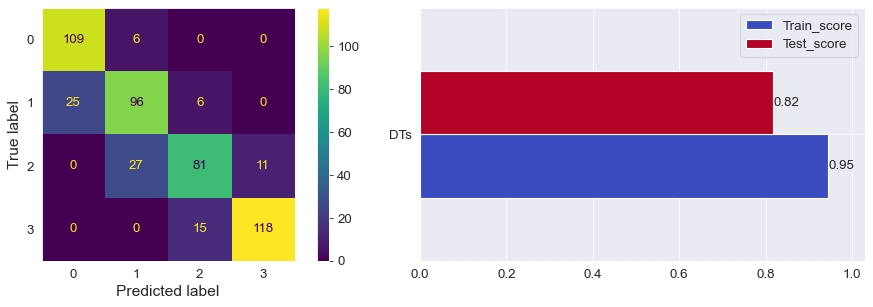

In [61]:
train_test_score_dts = model_evaluation(grid_model_dts, X_train, X_test, y_train, y_test, "DTs")

# RandomForest (RL)

__Train test splitting :__

In [62]:
X, y = df_train.drop("price_range", axis = 1), df_train.price_range
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

__Hyperparameter tuning :__

In [63]:
rl =  make_pipeline(StandardScaler(), RandomForestClassifier(n_jobs = -1))
params = {
    'randomforestclassifier__n_estimators': [10,20,30,40], 
    'randomforestclassifier__max_depth': np.arange(5, 10),
    'randomforestclassifier__min_samples_leaf': [1, 2, 3],
    'randomforestclassifier__min_samples_split' : np.arange(2, 10)
    }
grid_model_rl = hyperparameter_tuning(rl, params, X_train, y_train)

Best  hyperparameters : 

{'randomforestclassifier__max_depth': 8, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 9, 'randomforestclassifier__n_estimators': 40}
******************************
Best accuracy_score : 

0.8649763399763399


__Evaluation :__

************************Test result*************************
              precision    recall  f1-score   support

           0       0.87      0.95      0.90       115
           1       0.76      0.79      0.78       127
           2       0.81      0.72      0.76       119
           3       0.94      0.92      0.93       133

    accuracy                           0.85       494
   macro avg       0.84      0.85      0.84       494
weighted avg       0.85      0.85      0.84       494

************************Train result************************
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.97      0.95      0.96       367
           2       0.95      0.98      0.96       381
           3       1.00      0.98      0.99       366

    accuracy                           0.98      1481
   macro avg       0.98      0.98      0.98      1481
weighted avg       0.98      0.98      0.98      1481

********

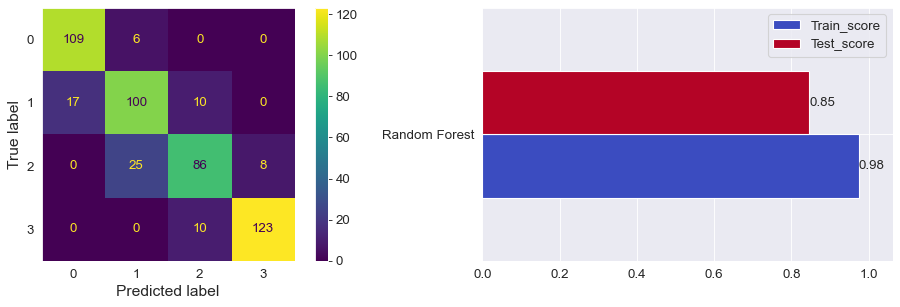

In [64]:
train_test_score_rl = model_evaluation(grid_model_rl,X_train, X_test, y_train, y_test, "Random Forest")

# Support Vector Machine (SVM)

__Point : as default the SVM model works on multiclass target__

__Tran test splitting :__

In [65]:
X, y = df_train.drop("price_range", axis = 1), df_train.price_range
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

__Scaling :__

In [66]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = scaler.feature_names_in_)
X_test = pd.DataFrame(scaler.transform(X_test), columns = scaler.feature_names_in_)

__As svm takes a long time for hyperparamter tuning, i used all other kernel for svm then linear kernel gave a <br> better result than others, so i do not use other kernel here to save time__

__Hyperparameter tuning :__

In [67]:
svm =  SVC()
params = {'kernel': ['linear'], 'C': [0.1,0.3, 1,2,2.5, 3,3.5, 4, 10]}
grid_model_svm = hyperparameter_tuning(svm, params, X_train, y_train)

Best  hyperparameters : 

{'C': 3.5, 'kernel': 'linear'}
******************************
Best accuracy_score : 

0.9648785148785148


__Evaluation :__

************************Test result*************************
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       115
           1       0.93      0.94      0.94       127
           2       0.97      0.93      0.95       119
           3       0.98      0.98      0.98       133

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494

************************Train result************************
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.97      0.98      0.97       367
           2       0.98      0.96      0.97       381
           3       0.98      0.99      0.98       366

    accuracy                           0.98      1481
   macro avg       0.98      0.98      0.98      1481
weighted avg       0.98      0.98      0.98      1481

********

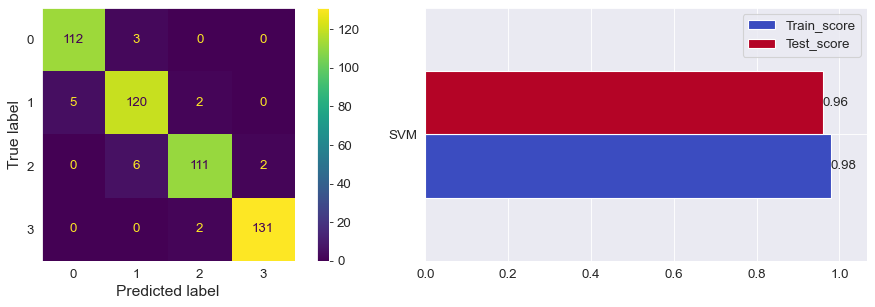

In [68]:
train_test_score_svm = model_evaluation(grid_model_svm, X_train, X_test, y_train, y_test, "SVM")

# Models Comparison

__Concatinating the results of all the three model :__

In [69]:
models_comparison = pd.concat([train_test_score_dts, train_test_score_rl, train_test_score_svm])

__Plotting the result barplot :__

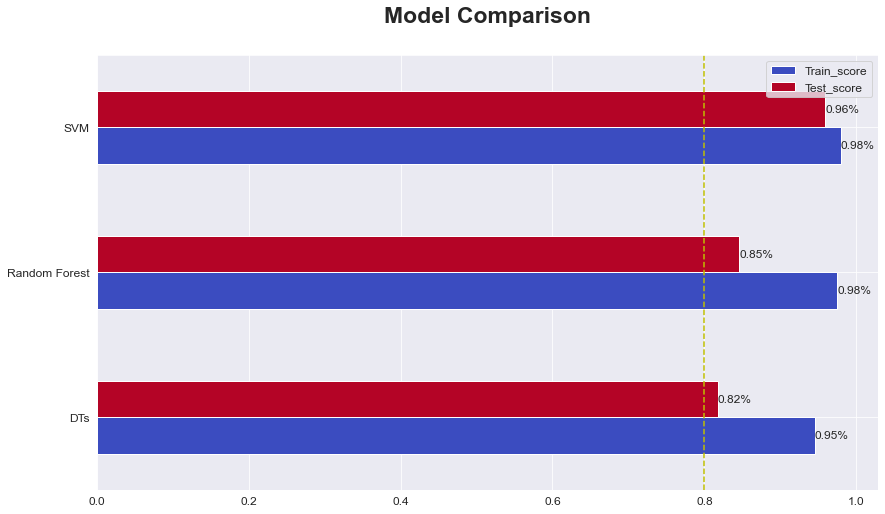

In [70]:
ax = models_comparison.plot(kind = "barh", cmap = "coolwarm", figsize = (14,8))
plt.axvline(x = .8, ls = "--", color = "y")
plt.title("Model Comparison", fontweight = "bold", size = 23, y = 1.06)
set_freq_label(ax, fmt = "%.2f%%")

+ __Conculsion :__
    - As the dataset is highly balanced, comapring just the accuracy score can show how well the models work
    - Here, the plot shows that the svm is just fit and has as great score on the test data and train data, <br>
    but the others are showing kind of overfitting which is terrible
    - __The SVM model is selected as the final model__

# 🏆 Acurracy 96% 

----

# ⭕️ Final Model Testing On The Unknown Data 

__Train test splitting :__

In [71]:
X, y = df_train.drop("price_range", axis = 1), df_train.price_range

__Model building :__

In [72]:
Final_model = make_pipeline(StandardScaler(), SVC())
Final_model[1].set_params(**grid_model_svm.get_params())

SVC(C=3.5, kernel='linear')

In [73]:
Final_model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=3.5, kernel='linear'))])

## Test dataset

In [74]:
df_test.head()

battery_power  Blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  16        226      1412  3476    12     7          2   
1        191        5  12        746       857  3895     6     5          7   
2        186        3   4       1270      1366  2396    17    10         10   
3         96        8  20        295      1752  3893    10     5          7   
4        108        6  18        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  
0        0             1     0  
1        1             0     0  
2        0             1     1  
3        1             1     0  
4        1             0     1

In [75]:
y_final_pred = Final_model.predict(df_test)

__Showing the predicted test target frequency :__

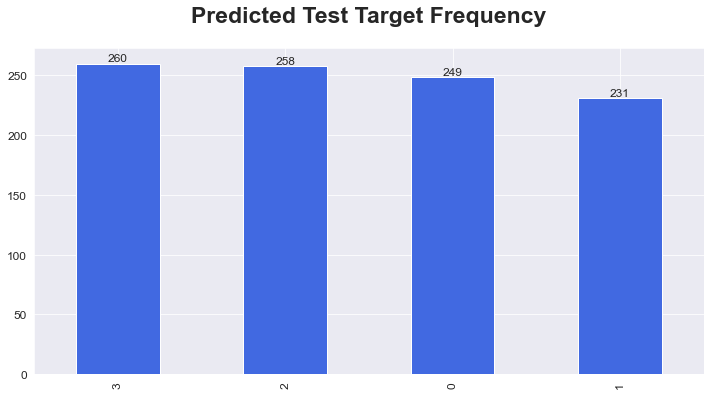

In [76]:
final_prediction = pd.Series(y_final_pred)
ax = final_prediction.value_counts().plot.bar(figsize = (12,6), color = "royalblue")
plt.title("Predicted Test Target Frequency",  fontweight = "bold", size = 23, y = 1.06)
set_freq_label(ax)